Warning message:
“Removed 35 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


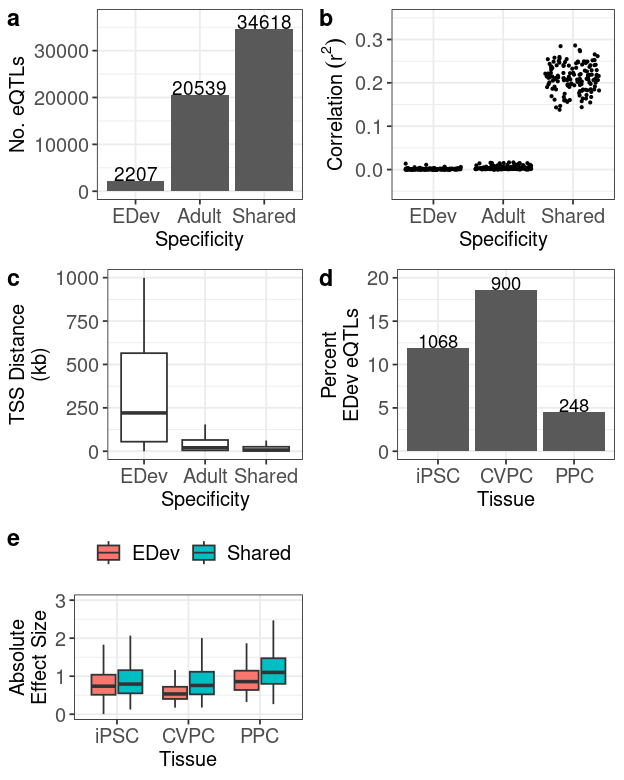

In [5]:
source("~/software/notebook_assist/functions.R")
source("~/software/notebook_assist/packages.R")
setwd("~/projects/Resource/iPSCORE_Multi-QTL_Resource/SourceData/")

theme_bw2 = theme_bw() +
    theme(
        axis.text = element_text(size = 12),
        strip.text = element_text(size = 12),
        axis.title = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12),
        legend.position = "top"
    )

### load SourceData 

a_data = fread("SOURCEDATA.FIGURE3A.txt",sep="\t",data.table=F)
b_data = fread("SOURCEDATA.FIGURE3B.txt",sep="\t",data.table=F)
c_data = fread("SOURCEDATA.FIGURE3C.txt",sep="\t",data.table=F)
d_data = fread("SOURCEDATA.FIGURE3D.txt",sep="\t",data.table=F)
e_data = fread("SOURCEDATA.FIGURE3E.txt",sep="\t",data.table=F)

a_data$Specificity = factor(a_data$Specificity, levels = c("EDev","Adult","Shared"))
b_data$`QTL Specificity` = factor(b_data$`QTL Specificity`, levels = c("EDev","Adult","Shared"))
c_data$Category = factor(c_data$Category, levels = c("EDev","Adult","Shared"))
d_data$Tissue = factor(d_data$Tissue, levels = c("iPSC","CVPC","PPC"))
e_data$tissue = factor(e_data$tissue, levels = c("iPSC","CVPC","PPC"))


## plot graphs


a = ggplot(a_data, aes(Specificity, No_eQTLs)) + theme_bw2 + 
        xlab("Specificity") + ylab("No. eQTLs") +
        ylim(c(0,37000)) +
        geom_bar(stat = "identity") + 
        geom_text(aes(label = No_eQTLs), vjust = 0, size =4)

b = ggplot(b_data, aes(`QTL Specificity`, r2, group=`QTL Specificity`)) + theme_bw2 + 
        ylim(c(-0.05,0.35)) + xlab("Specificity") +
        ylab(bquote('Correlation'~(r^2))) +  geom_jitter(size=0.5) 

c = ggplot(c_data, aes(Category, dist/1000, group=Category)) + theme_bw2 + 
        xlab("Specificity") + ylab("TSS Distance\n(kb)") + geom_boxplot(outlier.shape = NA)


d = ggplot(d_data, aes(Tissue, frac_eqtls)) + theme_bw2 + 
        ylim(0,20) + ylab("Percent\nEDev eQTLs") +
        geom_text(aes(label = n_edev), vjust = 0) + 
        geom_bar(stat="identity")

e = ggplot(e_data, aes(tissue, abs(beta), fill = Category)) + theme_bw2 + 
            theme(legend.title = element_text(size = 0)) + 
            ylab("Absolute\nEffect Size") + xlab("Tissue") +
            ylim(c(0,3)) +
            geom_boxplot(outlier.shape =  NA)

psize(6.5,5.2)
plot_grid(a,b,c,d,e,labels=c("a","b","c","d","e"),nrow=3)